<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/SVM_Machine_Learning/blob/main/Concrete_Compressive_Strength_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Concrete Compressive Strength Data Set**
---
---

**Data Characteristics:**

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory.

Data is in raw form (not scaled).

Summary Statistics:

- Number of instances (observations): 1030
- Number of Attributes: 9
- Attribute breakdown: 8 quantitative input variables, and 1 quantitative

**output variable :**

Missing Attribute Values: None

---

**The other columns, such as age, cement content, water content, etc., are the features or independent variables that will be used to predict the target variable (Compressive Strength).**

In [1]:
## importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
## calling storing the csv data into dataframe:
data = pd.read_csv("/content/concrete_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [3]:
## checking null values:
print(f"total_null_values \n{data.isnull().sum()}\n")
## checking total duplicated values:
print(f"total_duplicated_values \n{data.duplicated().sum()}\n")
## data shape
print(f"data shape:{data.shape}")

total_null_values 
cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

total_duplicated_values 
25

data shape:(1030, 9)


In [4]:
## droping the duplcated values:
data.drop_duplicates(inplace=True)

## data shape
print(f"data shape{data.shape}")

data shape(1005, 9)


In [5]:
## sample data
data.sample(5)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
541,333.0,0.0,0.0,192.0,0.0,931.2,842.6,3,15.62
616,277.0,0.0,0.0,191.0,0.0,968.0,856.0,360,33.70
51,190.0,190.0,0.0,228.0,0.0,932.0,670.0,180,46.93
820,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,270,67.11
436,172.4,13.6,172.4,156.8,4.1,1006.3,856.4,28,33.69


In [6]:
## separating the data feature and targrt:
x = data.drop("concrete_compressive_strength", axis=1)
y = data["concrete_compressive_strength"]

Let's Explore the data:

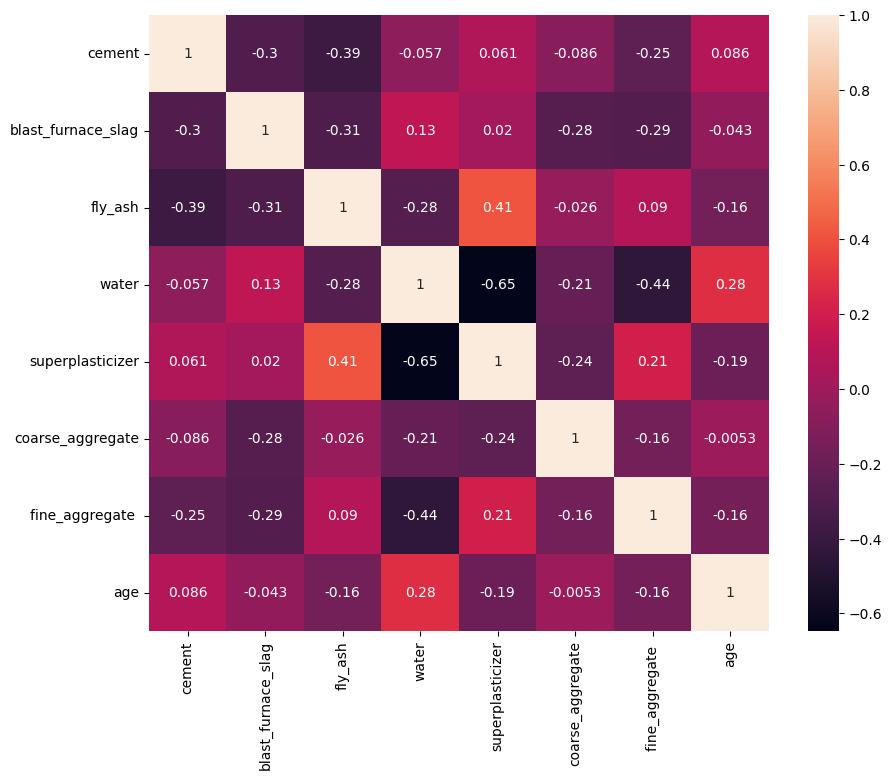

In [7]:
plt.figure(figsize=(10, 8))  # Setting size of the figure
sns.heatmap(x.corr(), annot=True)

# Display the plot
plt.show()

In [8]:
## plotting pairplot
#sns.pairplot(x, height=2);


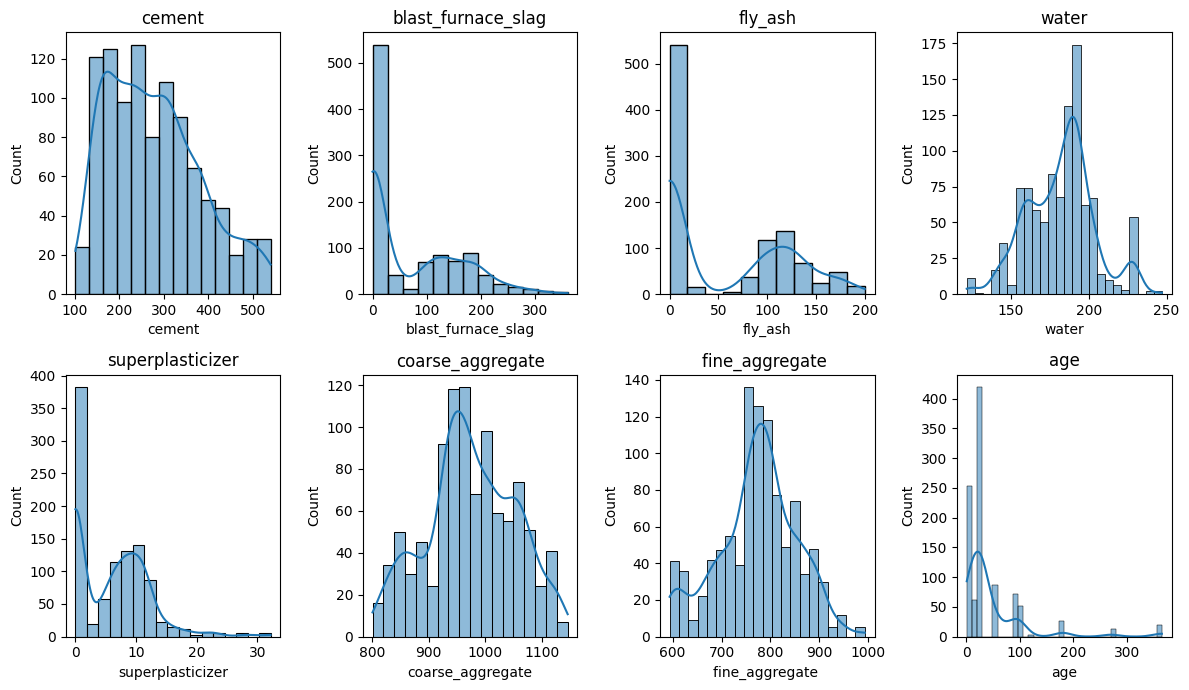

In [9]:
## extracting column:
colm = []
for i in x.columns:
    colm.append(i)
num_rows = 2
num_cols = 4

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 7))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(colm):
    sns.histplot(x[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [10]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.0,190.7,265.0,349.0,540.0
blast_furnace_slag,1005.0,72.043483,86.170807,0.0,0.0,20.0,142.5,359.4
fly_ash,1005.0,55.536318,64.207969,0.0,0.0,0.0,118.3,200.1
water,1005.0,182.075323,21.339334,121.8,166.6,185.7,192.9,247.0
superplasticizer,1005.0,6.033234,5.919967,0.0,0.0,6.1,10.0,32.2
coarse_aggregate,1005.0,974.376816,77.579667,801.0,932.0,968.0,1031.0,1145.0
fine_aggregate,1005.0,772.688259,80.340435,594.0,724.3,780.0,822.2,992.6
age,1005.0,45.856716,63.734692,1.0,7.0,28.0,56.0,365.0


In [11]:
## defining the function for inter qantile range
def ranges(column,quant_1,quant_3):
    q1 = np.percentile(column,quant_1)
    q3 = np.percentile(column,quant_3)
    iqr = q3-q1

    ## higher bound:
    lower_bound = q1 = (1.5 * iqr)
    higher_bound = q3 + (1.5 * iqr)

    lower_bound = np.round(lower_bound,2)
    higher_bound = np.round(higher_bound,2)


    print(f"Q1 ({quant_1} percentile){q1}")
    print(f"Q3 ({quant_3} percentile){q3}")
    print(f"inter qantile range: {iqr}")
    print(f"lower_fence:{lower_bound}")
    print(f"higher_fence:{higher_bound}")

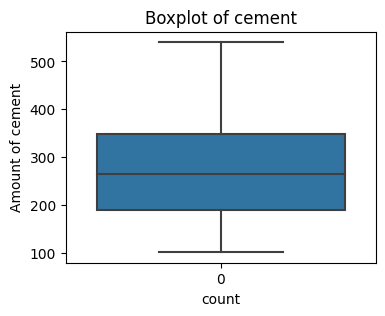

In [12]:
## checking the cement column:
## boxplot for cement
plt.figure(figsize=(4, 3))
sns.boxplot(x.cement);
plt.xlabel('count')
plt.ylabel('Amount of cement')
plt.title('Boxplot of cement');

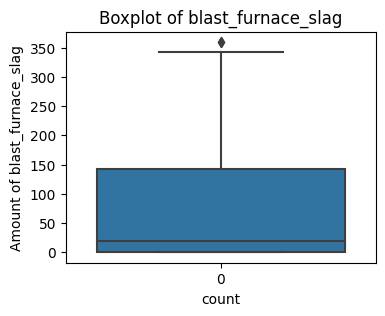

In [13]:
# checking the blast_furnace_slag column:
## boxplot for blast_furnace_slag
plt.figure(figsize=(4, 3))
sns.boxplot(x.blast_furnace_slag);
plt.xlabel('count')
plt.ylabel('Amount of blast_furnace_slag')
plt.title('Boxplot of blast_furnace_slag');

In [14]:
## quantile range
ranges(x.blast_furnace_slag, 25,75)

Q1 (25 percentile)213.75
Q3 (75 percentile)142.5
inter qantile range: 142.5
lower_fence:213.75
higher_fence:356.25


In [15]:
x[x.blast_furnace_slag > 340].count()

cement                4
blast_furnace_slag    4
fly_ash               4
water                 4
superplasticizer      4
coarse_aggregate      4
fine_aggregate        4
age                   4
dtype: int64

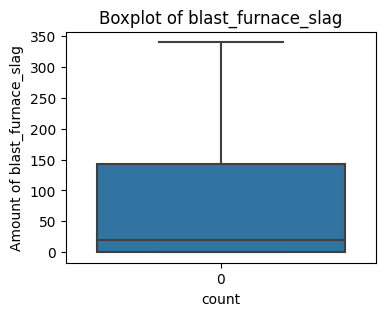

In [16]:
blast_furnace_slag_max = 340
for i in range(len(x.blast_furnace_slag)):
    if x["blast_furnace_slag"].values[i] >  blast_furnace_slag_max:
        x["blast_furnace_slag"].values[i] = blast_furnace_slag_max

## boxplot for blast_furnace_slag
plt.figure(figsize=(4, 3))
sns.boxplot(x.blast_furnace_slag);
plt.xlabel('count')
plt.ylabel('Amount of blast_furnace_slag')
plt.title('Boxplot of blast_furnace_slag');

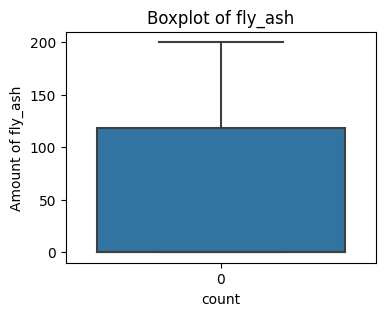

In [17]:
## boxplot for fly_ash
plt.figure(figsize=(4, 3))
sns.boxplot(x.fly_ash);
plt.xlabel('count')
plt.ylabel('Amount of fly_ash')
plt.title('Boxplot of fly_ash');

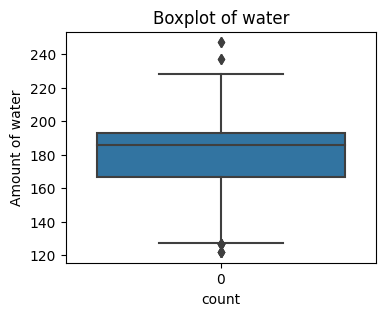

In [18]:
## boxplot for water
plt.figure(figsize=(4, 3))
sns.boxplot(x.water);
plt.xlabel('count')
plt.ylabel('Amount of water')
plt.title('Boxplot of water');

In [19]:
ranges(x.water, 20, 80)

Q1 (20 percentile)50.31000000000003
Q3 (80 percentile)195.54000000000002
inter qantile range: 33.54000000000002
lower_fence:50.31
higher_fence:245.85


In [20]:
print(x[x.water > 230].count())
print(x[x.water < 125].count())

cement                4
blast_furnace_slag    4
fly_ash               4
water                 4
superplasticizer      4
coarse_aggregate      4
fine_aggregate        4
age                   4
dtype: int64
cement                5
blast_furnace_slag    5
fly_ash               5
water                 5
superplasticizer      5
coarse_aggregate      5
fine_aggregate        5
age                   5
dtype: int64


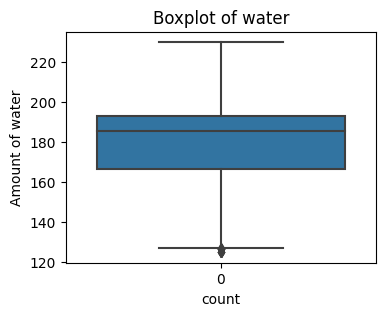

In [21]:
water_max = 230
water_min = 125

for i in range(len(x.water)):
    if x.water.values[i] > water_max:
        x.water.values[i] = water_max
    elif x.water.values[i] < water_min:
        x.water.values[i] = water_min

## boxplot for water
plt.figure(figsize=(4, 3))
sns.boxplot(x.water);
plt.xlabel('count')
plt.ylabel('Amount of water')
plt.title('Boxplot of water');

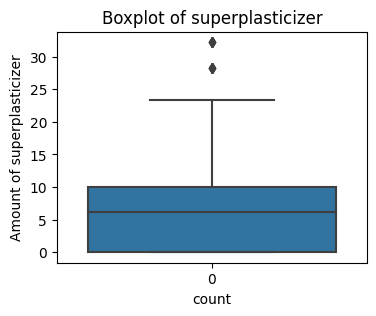

In [22]:
## boxplot for superplasticizer
plt.figure(figsize=(4, 3))
sns.boxplot(x.superplasticizer);
plt.xlabel('count')
plt.ylabel('Amount of superplasticizer')
plt.title('Boxplot of superplasticizer');

In [23]:
x[x.superplasticizer > 23].count()

cement                15
blast_furnace_slag    15
fly_ash               15
water                 15
superplasticizer      15
coarse_aggregate      15
fine_aggregate        15
age                   15
dtype: int64

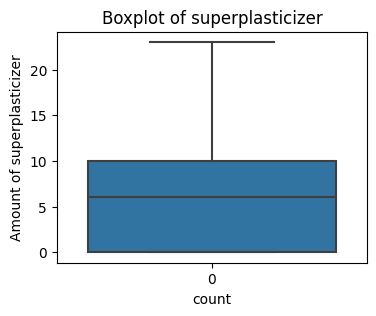

In [24]:
superplasticizer_max = 23


for i in range(len(x.superplasticizer)):
    if x.superplasticizer.values[i] > superplasticizer_max:
        x.superplasticizer.values[i] = superplasticizer_max


## boxplot for superplasticizer
plt.figure(figsize=(4, 3))
sns.boxplot(x.superplasticizer);
plt.xlabel('count')
plt.ylabel('Amount of superplasticizer')
plt.title('Boxplot of superplasticizer');

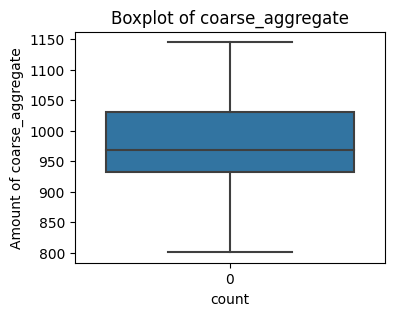

In [25]:
## boxplot for coarse_aggregate
plt.figure(figsize=(4, 3))
sns.boxplot(x.coarse_aggregate	);
plt.xlabel('count')
plt.ylabel('Amount of coarse_aggregate')
plt.title('Boxplot of coarse_aggregate');

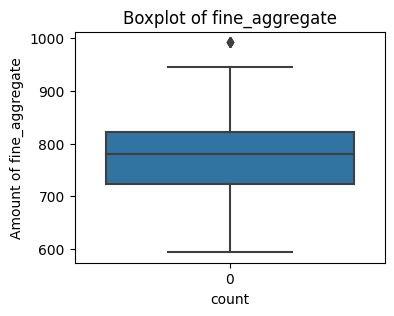

In [26]:
## boxplot for fine_aggregate
plt.figure(figsize=(4, 3))
sns.boxplot(x['fine_aggregate ']);
plt.xlabel('count')
plt.ylabel('Amount of fine_aggregate')
plt.title('Boxplot of fine_aggregate');

In [27]:
x[x['fine_aggregate '] > 950].count()

cement                5
blast_furnace_slag    5
fly_ash               5
water                 5
superplasticizer      5
coarse_aggregate      5
fine_aggregate        5
age                   5
dtype: int64

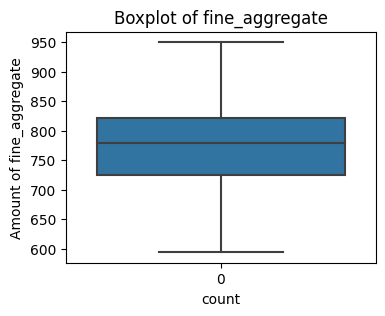

In [28]:
fine_aggregate_max = 950

for i in range(len(x['fine_aggregate '])):
    if x['fine_aggregate '].values[i] > fine_aggregate_max:
        x['fine_aggregate '].values[i] = fine_aggregate_max

## boxplot for fine_aggregate
plt.figure(figsize=(4, 3))
sns.boxplot(x['fine_aggregate ']);
plt.xlabel('count')
plt.ylabel('Amount of fine_aggregate')
plt.title('Boxplot of fine_aggregate');

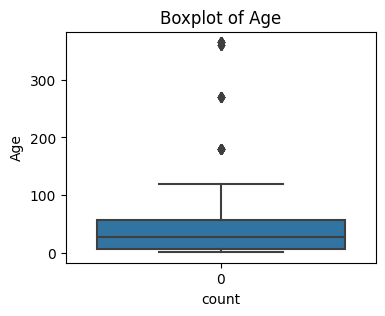

In [29]:
## boxplot for age
plt.figure(figsize=(4, 3))
sns.boxplot(x['age']);
plt.xlabel('count')
plt.ylabel('Age')
plt.title('Boxplot of Age');

In [30]:
##quantile range of age
ranges(x.age, 1, 74)

Q1 (1 percentile)79.5
Q3 (74 percentile)56.0
inter qantile range: 53.0
lower_fence:79.5
higher_fence:135.5


In [31]:

x[x.age > 100].count()

cement                62
blast_furnace_slag    62
fly_ash               62
water                 62
superplasticizer      62
coarse_aggregate      62
fine_aggregate        62
age                   62
dtype: int64

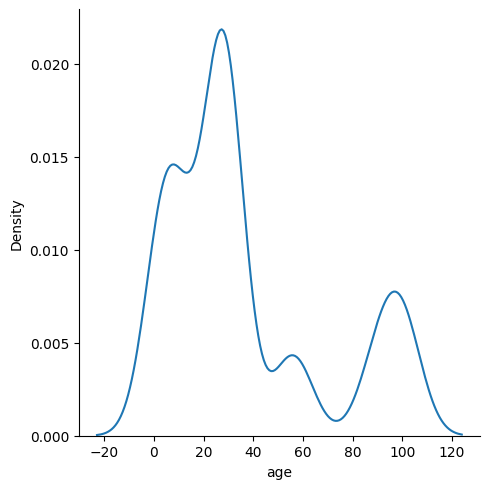

In [32]:
age_max = 100

for i in range(len(x['age'])):
    if x['age'].values[i] > age_max:
        x['age'].values[i] = age_max

sns.displot(x.age, kind = 'kde')

In [33]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.0,190.7,265.0,349.0,540.0
blast_furnace_slag,1005.0,72.000697,86.033105,0.0,0.0,20.0,142.5,340.0
fly_ash,1005.0,55.536318,64.207969,0.0,0.0,0.0,118.3,200.1
water,1005.0,182.043881,21.172765,125.0,166.6,185.7,192.9,230.0
superplasticizer,1005.0,5.959602,5.655310,0.0,0.0,6.1,10.0,23.0
coarse_aggregate,1005.0,974.376816,77.579667,801.0,932.0,968.0,1031.0,1145.0
fine_aggregate,1005.0,772.476318,79.813965,594.0,724.3,780.0,822.2,950.0
age,1005.0,36.284577,31.756491,1.0,7.0,28.0,56.0,100.0


In [34]:
### import from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

print("shape of x_train{} and have dimension: {}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension: {}" .format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension: {}".format(x_test.shape, x_test.ndim))
print("shape of y_test{} and have dimension:  {}".format(y_test.shape, x_test.ndim))


shape of x_train(804, 8) and have dimension: 2
shape of y_train(804,) and have dimension: 1
shape of x_test(201, 8)  and have dimension: 2
shape of y_test(201,) and have dimension:  2


In [35]:
## standaring the x_train and x_test:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## checking data and dimension
print("shape of scaled_x_train{} and have dimension: {}".format(x_train_scaled.shape, x_train_scaled.ndim))
print("shape of scaled_x_test{}  and have dimension: {}".format(x_test_scaled.shape, x_test_scaled.ndim))
x_train_scaled[3]


shape of scaled_x_train(804, 8) and have dimension: 2
shape of scaled_x_test(201, 8)  and have dimension: 2


array([ 1.51928039, -0.83823231, -0.87586539,  1.68020188, -1.05752856,
       -1.73741933, -0.66634178, -0.26138192])

In [36]:
## model fitting
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

model = SVR(C=2.0, kernel='linear')
selector = RFE(model, n_features_to_select=6, step=1)  # Select the top 5 features
svr_model = selector.fit(x_train_scaled, y_train)

"""
Recursive Feature Elimination (RFE):
RFE is an iterative method that starts with all features and repeatedly removes the least important features
until the desired number is reached. It uses the model's feature importances to rank and select features.
"""

"\nRecursive Feature Elimination (RFE):\nRFE is an iterative method that starts with all features and repeatedly removes the least important features \nuntil the desired number is reached. It uses the model's feature importances to rank and select features.\n"

In [37]:
## making predictions :
y_pred = svr_model.predict(x_test_scaled)

In [38]:
## compairing the prediction with truth values:
print("y_pred dimensions :",y_pred.ndim)
print("y_test dimension :", y_test.ndim)
"""
y_pred_flatten = y_pred.flatten()
y_test_flatten = y_test.values.flatten()
print(y_pred_flatten.ndim)
print(y_test_flatten.ndim)
"""



prediction_result = []
Squared_difference = []
absolute_difference = []
j=0
for i in y_test:
    diff = i - y_pred[j]
    prediction_result.append(round(diff,2))
    j = j+1

for i in prediction_result:
    mse = i*i
    Squared_difference.append(mse)
    absolute_difference.append(abs(i))


prediction_table = pd.DataFrame({'Actual': y_test, 'Predict' : (np.round(y_pred,2)) , "(Actual-preds)" : prediction_result, "Squared_difference":np.round(Squared_difference,2), 'absolute_difference': absolute_difference })


y_pred dimensions : 1
y_test dimension : 1


In [39]:
prediction_table.sample(50)

,Actual,Predict,(Actual-preds),Squared_difference,absolute_difference
939,32.72,23.52,9.20,84.64,9.20
116,61.09,51.71,9.38,87.98,9.38
259,13.33,20.53,-7.20,51.84,7.20
356,63.14,37.71,25.43,646.68,25.43
873,28.63,23.96,4.67,21.81,4.67
908,44.52,47.14,-2.62,6.86,2.62
289,7.32,19.53,-12.21,149.08,12.21
471,57.03,53.12,3.91,15.29,3.91
841,30.12,32.19,-2.07,4.28,2.07
505,37.92,46.11,-8.19,67.08,8.19


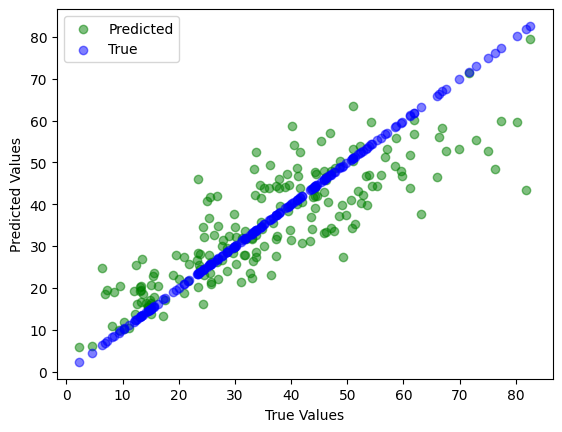

In [40]:

# Assuming y_test and y_pred are your true and predicted values, respectively

plt.scatter(y_test, y_pred, c='green', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='blue', label='True', alpha=0.5)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


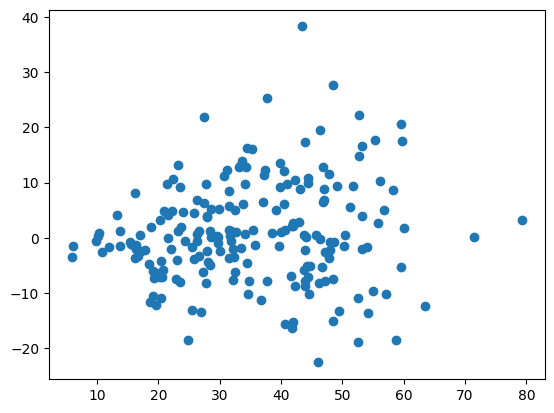

In [41]:
residual = y_test - y_pred
plt.scatter(y_pred,residual)

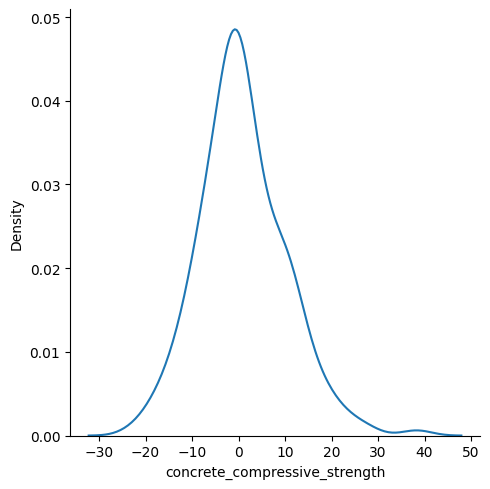

In [42]:
sns.displot(residual,kind="kde");

In [43]:
## importing performance matrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


## performance matric mean square error:
mse = mse(y_test,y_pred)
print(f"mean_square_error : {mse}")


## Root mean squared error:
rmse = np.sqrt(mse)
print(f"Root_mean_squared_error:{(rmse)}")


## performance matric mean absolute error:
mae = mae(y_test,y_pred)
rounded_mae = round(mae, 1)
print(f"mean_absolute_error : {rounded_mae}")

mean_square_error : 85.91350829486176
Root_mean_squared_error:9.268954002197969
mean_absolute_error : 7.0


In [44]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
p=8
n=len(y_test)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {np.round(adjusted_r_squared,2)}")

R-squared: 0.712013609052196
Adjusted R-squared: 0.7


## model entry:

- in first run model accuracy is 49 percent  (used sigmoid kernel)
- in second run model accuracy improved to 62  used default parameter Radial Basis Function (RBF) kernel
- in third run kernel linear with rff (5 best estimator) accuracy improved further 1%
- tweeked all outlier of age @ age value > 100 become 100 make the data little bivariate but outlier are fixed and accuracy improved to **R-squared: 0.71 and
Adjusted R-squared: 0.7**

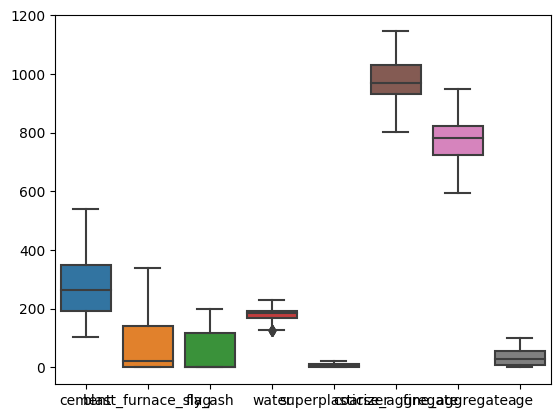

In [45]:
sns.boxplot(x);